In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv(r"C:\Users\KingED\Downloads\APY.csv")
data

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [49]:
# cleaning data and filling in the blanks
data.replace(" ", "", inplace=True)
data = data.dropna(subset='Crop')
data['Production'].fillna(data['Production'].mean(), inplace=True)
print(data.isna().sum())

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


C:\Users\KingED\AppData\Local\Temp\ipykernel_13360\2199821949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Production'].fillna(data['Production'].mean(), inplace=True)


In [56]:
data2 = data[data['Season'] != 'Whole Year ']
print(data2['Season'].unique())
data2

['Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     ' 'Winter     ']


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


performing some visulaizations on the data and showing their summary statistics

State
Tamil Nadu                    5617807.11
West Bengal                   5423352.37
Karnataka                     4329563.37
Assam                         4160131.22
Andhra Pradesh                3482502.18
Kerala                        2056747.29
Puducherry                     879016.46
Uttar Pradesh                  251711.27
Andaman and Nicobar Island     236056.64
Goa                            144590.69
Madhya Pradesh                 113598.12
Telangana                      105617.22
Bihar                           93371.20
Gujarat                         78597.05
Maharashtra                     68459.85
Rajasthan                       67451.91
Odisha                          60382.52
Haryana                         55165.14
Chhattisgarh                    30200.37
Punjab                          27946.55
Uttarakhand                     23127.66
Nagaland                        20037.89
Manipur                         16523.43
Arunachal Pradesh               14481.90
Meghalaya 

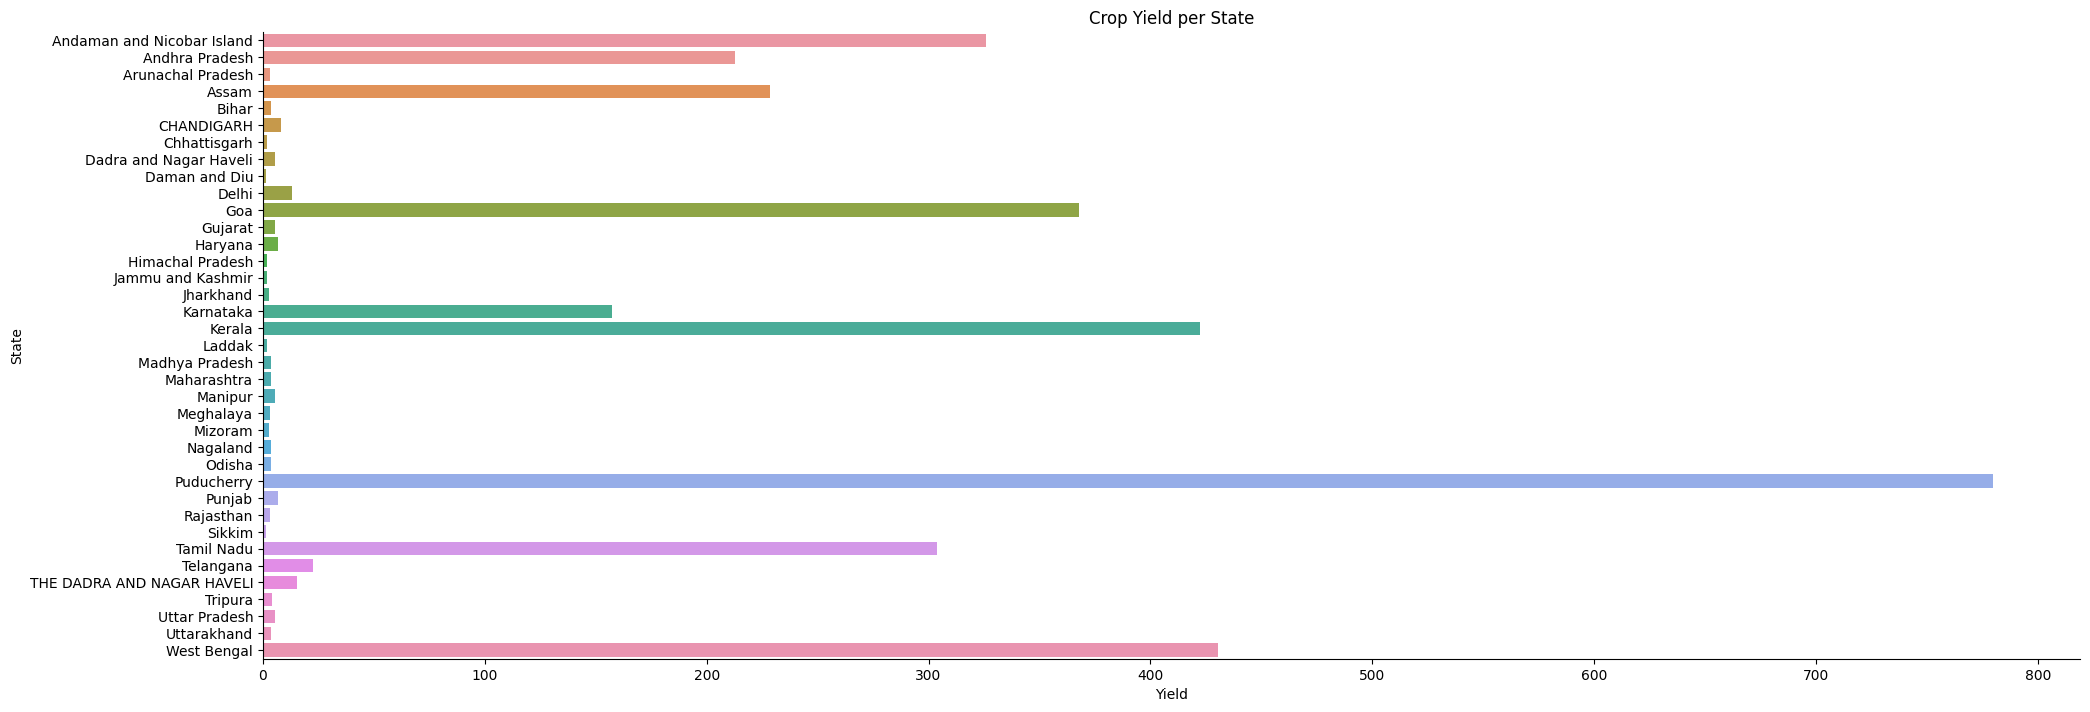

In [51]:
print(data.groupby("State")['Yield'].sum().sort_values(ascending=False))
sns.catplot(data=data, y='State', x='Yield', kind='bar', errorbar=None, height=7, aspect=3)
plt.title("Crop Yield per State")
plt.show()

Crop
Coconut                  25854916.08
Sugarcane                  608294.73
Potato                     141433.65
Onion                      140682.96
Banana                     120275.87
Maize                       54399.05
Sweet potato                53287.97
Rice                        45350.00
Tapioca                     42876.86
Ginger                      29475.98
Wheat                       24974.64
Garlic                      22407.50
Bajra                       21463.33
Turmeric                    19851.45
Jute                        17957.43
Groundnut                   16504.08
Dry chillies                14042.61
Cotton(lint)                13670.17
Mesta                       12880.54
Barley                      11288.09
Cashewnut                   10637.43
Jowar                       10441.79
Tobacco                     10426.32
Peas & beans (Pulses)       10282.58
Arhar/Tur                    9515.90
Gram                         9205.38
Rapeseed &Mustard            9096

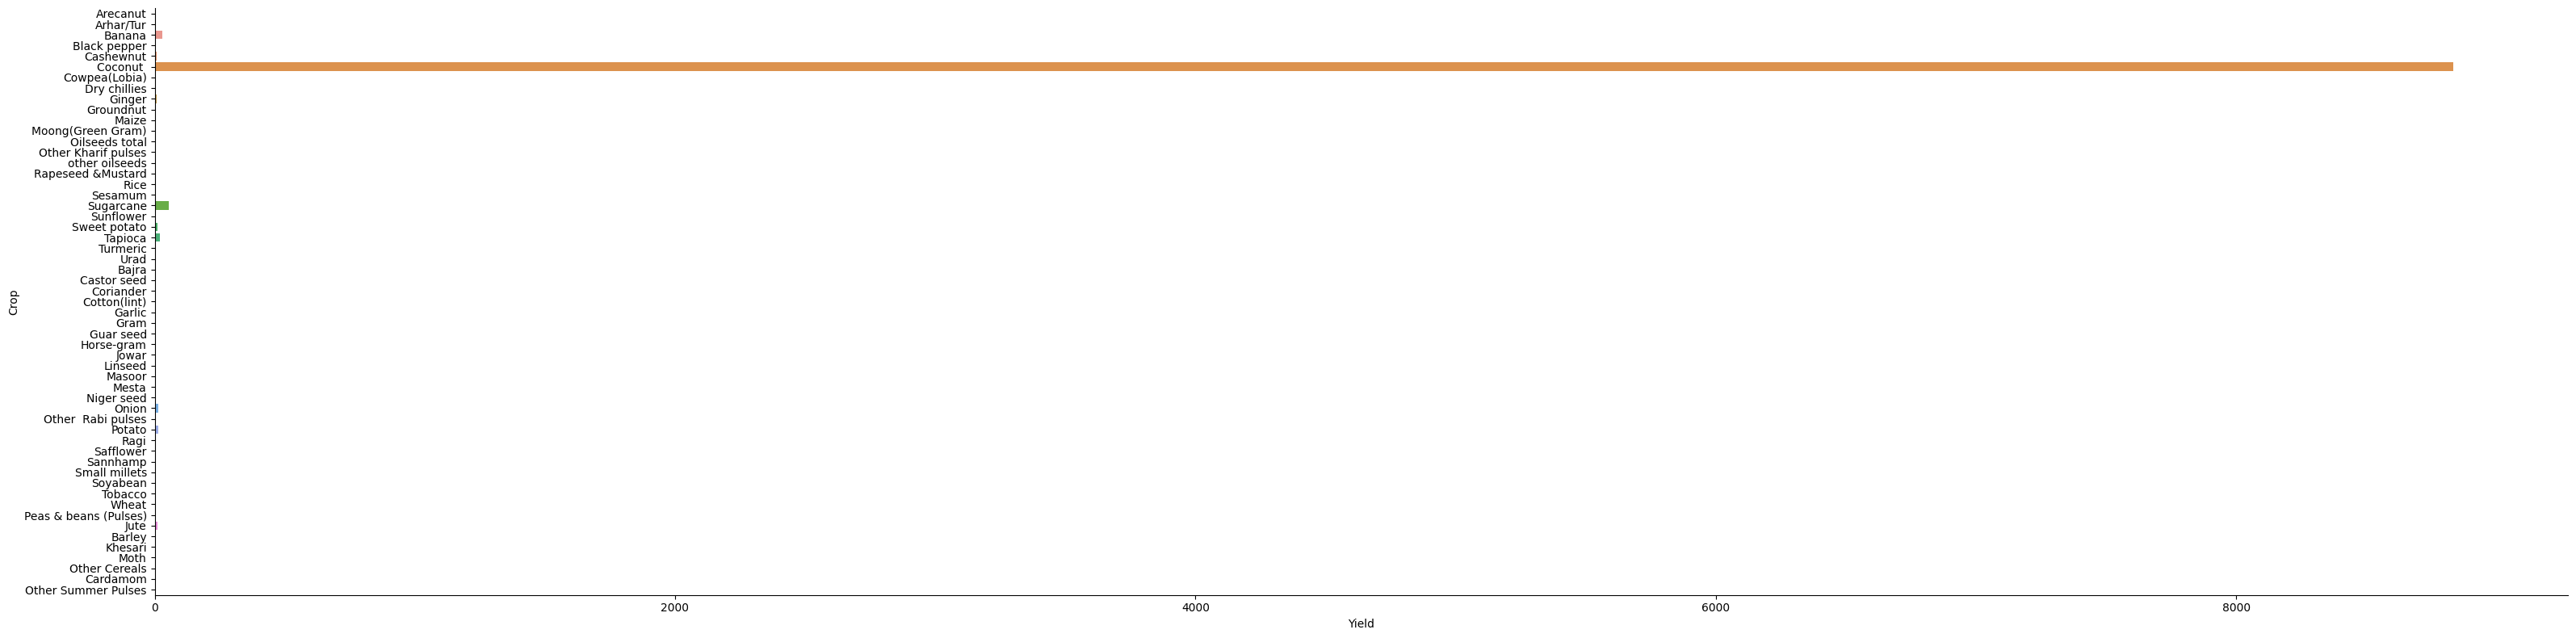

In [52]:
print(data.groupby("Crop")['Yield'].sum().sort_values(ascending=False))
sns.catplot(data=data, y='Crop', x='Yield', kind='bar', errorbar=None, height=8, aspect=4)
plt.show()